In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold

import tensorflow as tf

pd.options.display.max_columns = None

In [3]:
df_covid = pd.read_csv('./Covid_clean.csv')

C:\Users\ismael\AppData\Local\Temp\ipykernel_27228\3510291388.py:1: DtypeWarning: Columns (4,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_covid = pd.read_csv('./Covid_clean.csv')


In [5]:
# reemplazo los valores 2 por 0 en todo el dataset

# df_covid.replace(2, 0, inplace=True)

df_covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,fallecidos,mes,mes_nombre
0,0,1,1,1,2020-05-03,1.0,65.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1,5,May
1,0,1,0,1,2020-06-03,1.0,72.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,5,1,6,June
2,0,1,0,0,2020-06-09,0.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,6,June
3,0,1,1,1,2020-06-12,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,1,6,June
4,0,1,0,1,2020-06-21,0.0,68.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,1,6,June


In [6]:
# creamos el modelo de clasificacion

features = ['SEX', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
target = 'fallecidos'




# Validacion cruzada en vez de rebalanceo y random forest

In [5]:
X = df_covid[features]
y = df_covid[target]

Fold 0:
Exactitud: 0.9294468350848434
Matriz de confusión: [[185709   4334]
 [ 10127   4796]]


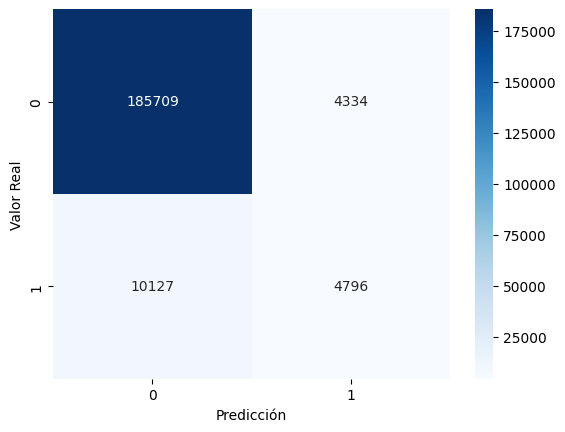

Fold 1:
Exactitud: 0.9306665495740757
Matriz de confusión: [[185716   4327]
 [  9884   5039]]


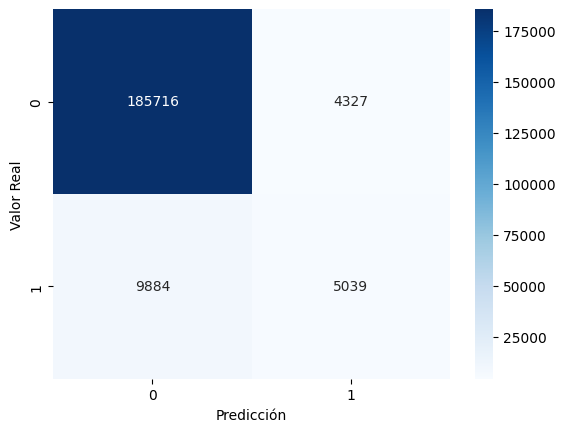

Fold 2:
Exactitud: 0.9308958558980513
Matriz de confusión: [[185808   4236]
 [  9928   4994]]


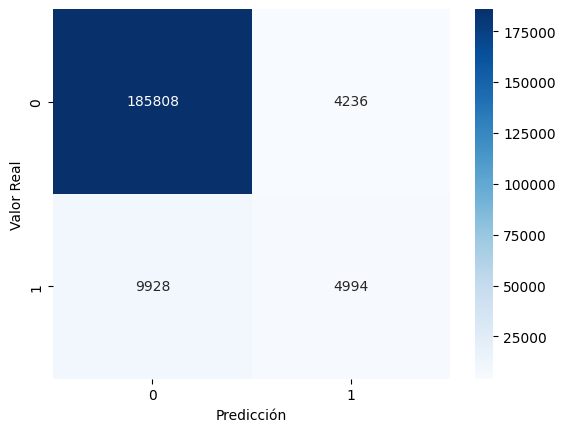

Fold 3:
Exactitud: 0.9299639940282779
Matriz de confusión: [[185680   4364]
 [  9991   4931]]


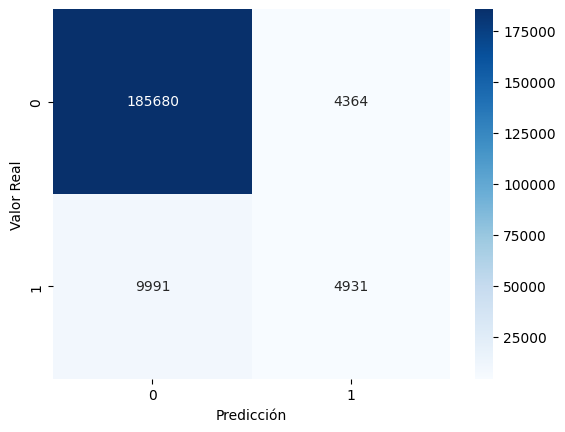

Fold 4:
Exactitud: 0.9300563510843315
Matriz de confusión: [[185731   4312]
 [ 10024   4898]]


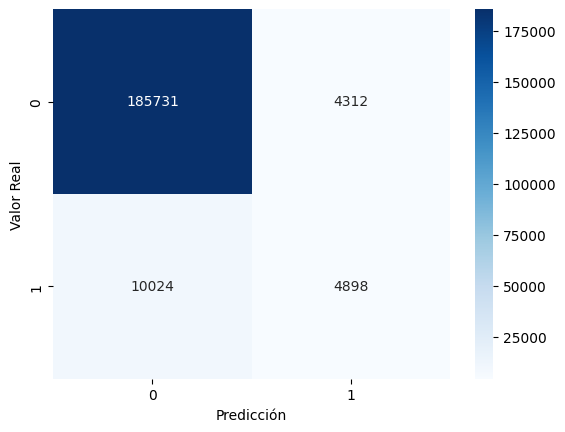

In [11]:
n_splits = 5  # Número de splits (folds)
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Definimos los arrays donde se guardarán los resultados
accuracy = np.zeros(n_splits)

# Definimos el modelo

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Iteramos sobre los splits definidos por StratifiedKFold

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    print(f'Fold {i}:')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Entrenamos el modelo
    model.fit(X_train, y_train)

    # Predecimos las clases del conjunto de test
    y_pred = model.predict(X_test)

    # Calculamos la exactitud
    accuracy[i] = accuracy_score(y_test, y_pred)
    print(f'Exactitud: {accuracy[i]}')

    # grafico la matriz de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f'Matriz de confusión: {conf_matrix}')
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()
    


Exactitud media: 0.930205917133916
Desviación estándar: 0.0005187099560714576
Matriz de confusión: [[185731   4312]
 [ 10024   4898]]


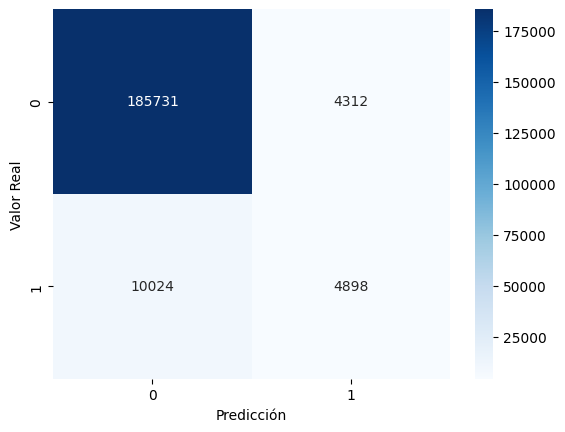

Área bajo la curva ROC: 0.9012128524037649
Precisión: 0.531813246471227
Exhaustividad: 0.32824018228119556


In [13]:
# Calculamos la exactitud media y su desviación estándar
print(f'Exactitud media: {accuracy.mean()}')

# Calculamos la desviación estándar

print(f'Desviación estándar: {accuracy.std()}')

# Calculamos la matriz de confusión

confusion_matrix(y_test, y_pred)
print(f'Matriz de confusión: {confusion_matrix(y_test, y_pred)}')

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()
# Calculamos la curva ROC

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculamos el área bajo la curva ROC

roc_auc_score(y_test, y_pred_proba)
print(f'Área bajo la curva ROC: {roc_auc_score(y_test, y_pred_proba)}')
# Calculamos la curva precision-recall

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculamos la precisión

precision_score(y_test, y_pred)
print(f'Precisión: {precision_score(y_test, y_pred)}')
# Calculamos la exhaustividad

recall_score(y_test, y_pred)
print(f'Exhaustividad: {recall_score(y_test, y_pred)}')